## Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs.
Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиальные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций.
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций).
Клиенты какого возраста совершили наибольшее количество успешных действий?

---
## Описание данных
### user_data:

client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст

### logs:
client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [18]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [20]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


2. Какой клиент совершил больше всего успешных операций? (success == True)

In [34]:
# most_success_clients = logs.query('success == True').value_counts('client') # альтернативный метод
most_success_clients = logs.loc[logs.success == True].client.value_counts()
most_success_clients

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

In [37]:
max_success_clients_num = most_success_clients.max()
max_success_clients_num

41

In [39]:
max_success_clients = most_success_clients.loc[most_success_clients == max_success_clients_num]
max_success_clients

client
28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: count, dtype: int64

In [42]:
list_max_success_clients = max_success_clients.index.sort_values()
list_max_success_clients

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

Вывод: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584 список клиентов с максимальным числом успешных поездок.

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [47]:
most_popular_platform = logs.loc[logs.success == True].platform.value_counts('').idxmax()
most_popular_platform

'phone'

Вывод: phone самая популярная платформа (для успешных вызовов)

4. Какую платформу предпочитают премиальные клиенты?

In [85]:
merge_logs_and_user_data = pd.merge(logs, user_data, how='inner', on='client')
merge_logs_and_user_data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [86]:
most_premium_platform = (merge_logs_and_user_data
                         .loc[merge_logs_and_user_data.premium == True]
                         .platform.value_counts()
                         .idxmax()
                         )
most_premium_platform

'phone'

Вывод: phone самая популярная платформа среди клиентов с премиум подпиской.

# Визуализация

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

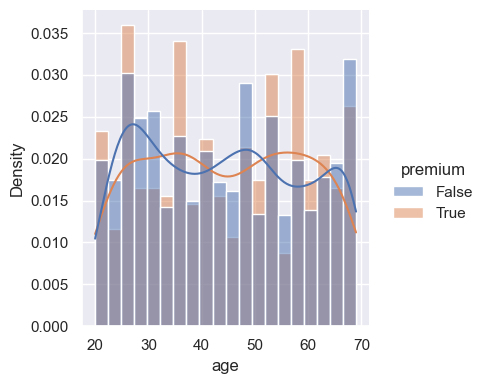

In [87]:
# Установка темы оформления для всех графиков Seaborn.
# "darkgrid" добавляет темный фон с сеткой для лучшей читаемости.
sns.set_theme(style="darkgrid")

# Создание гистограммы распределения. Эта функция строит график для визуализации распределения данных.
sns.displot(
    merge_logs_and_user_data,  # DataFrame, содержащий данные для визуализации.
    x="age",                   # Указывает, что данные в столбце 'age' будут отложены по оси X.
    hue='premium',             # Разделение данных по категориям в столбце 'premium' с разными цветами.
    kde=True,                  # Включает Kernel Density Estimate (KDE) для плавной оценки плотности распределения.
    height=4,                  # Высота каждого подграфика.
    kind="hist",               # Тип графика - гистограмма ('hist').
    stat='density',            # Показывает плотность распределения, а не количество.
    common_norm=False,         # Отключает нормализацию гистограммы по всем категориям.
    bins=20                    # Количество столбцов гистограммы.
)

6. Постройте график распределения числа успешных операций:

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

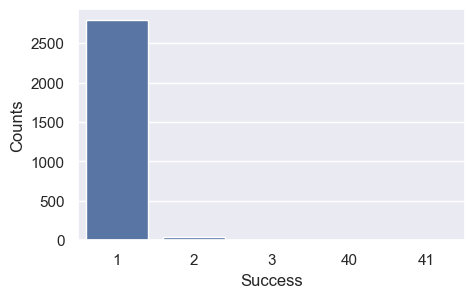

In [100]:
plt.figure(figsize=(5,3))
plt.xlabel('Success')
plt.ylabel('Counts')
sns.countplot(x=most_success_clients)
plt.show()

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций).
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [129]:
comp_success_users = merge_logs_and_user_data.loc[(merge_logs_and_user_data.platform == 'computer') & (merge_logs_and_user_data.success == True)]
comp_success_users

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


C:\Users\R\AppData\Local\Temp\ipykernel_20500\3321499937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=comp_success_users, palette=palette)


<Axes: xlabel='age', ylabel='count'>

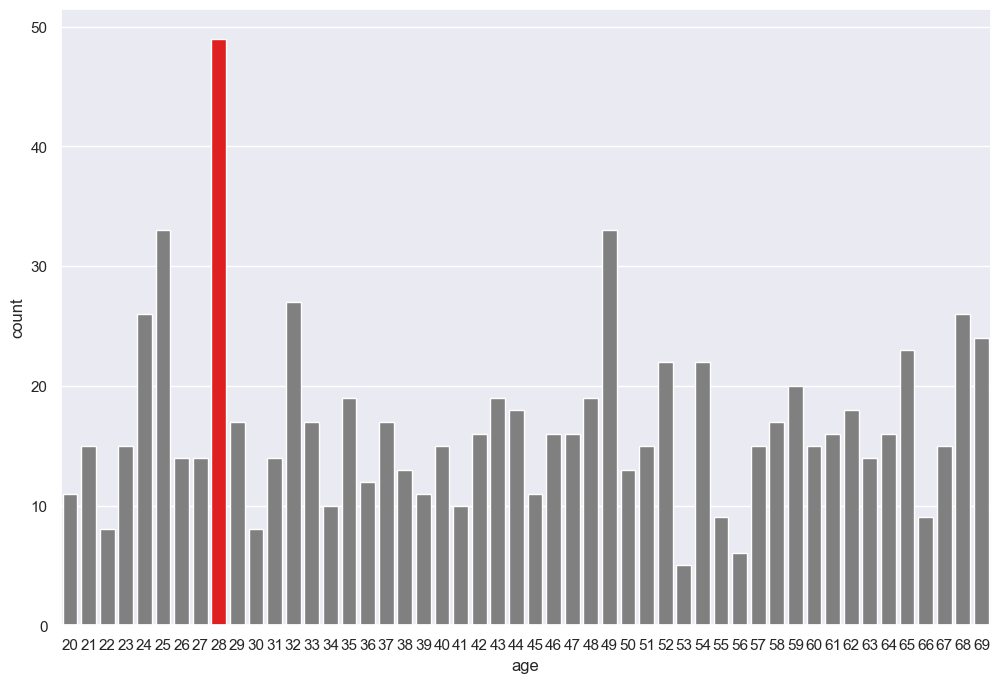

In [130]:
plt.figure(figsize=(12,8))

# Находим возраст с максимальным количеством пользователей
max_age_comp_success_users = comp_success_users['age'].value_counts().idxmax()

# Создаём список цветов, выделяя максимальное значение
palette = ['red' if (age == max_age_comp_success_users) else 'grey' for age in sorted(comp_success_users['age'].unique())]

# Строим график
sns.countplot(x='age', data=comp_success_users, palette=palette)

### Вывод: 28 лет - возраст с максимальным количеством пользователей.